In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
# Load Iris dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['class'] = iris.target

print(df_iris['class'].value_counts())
df_iris.head()


class
0    50
1    50
2    50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


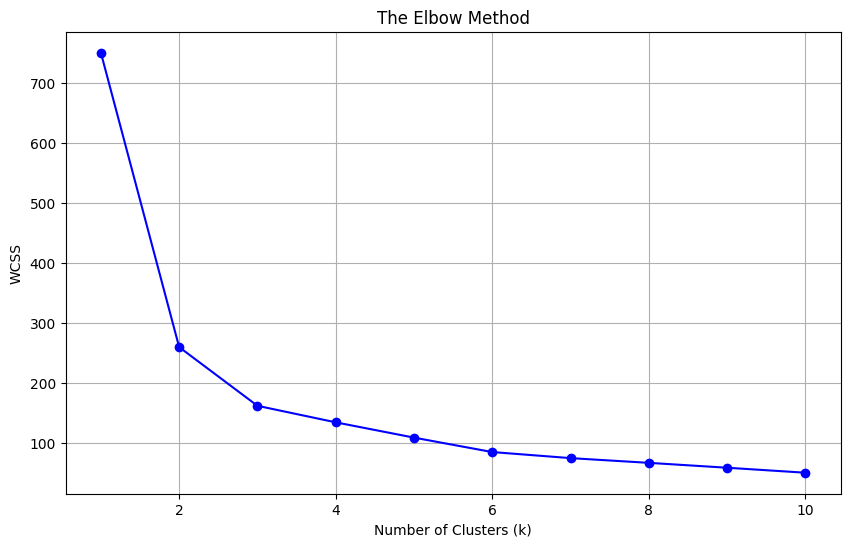

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_iris)

# 1. Elbow Method
wcss_values = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.grid(True)
plt.show()

In [33]:
# K-means với k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_iris['Cluster'] = kmeans.fit_predict(X_scaled)
wcss = kmeans.inertia_

# In WCSS và phân phối cụm
print(f"WCSS for k=3: {wcss:.4f}")
print("\nPhân phối cụm:")
print(pd.Series(kmeans.labels_).value_counts().sort_index())

WCSS for k=3: 162.1711

Phân phối cụm:
0    50
1    54
2    46
Name: count, dtype: int64


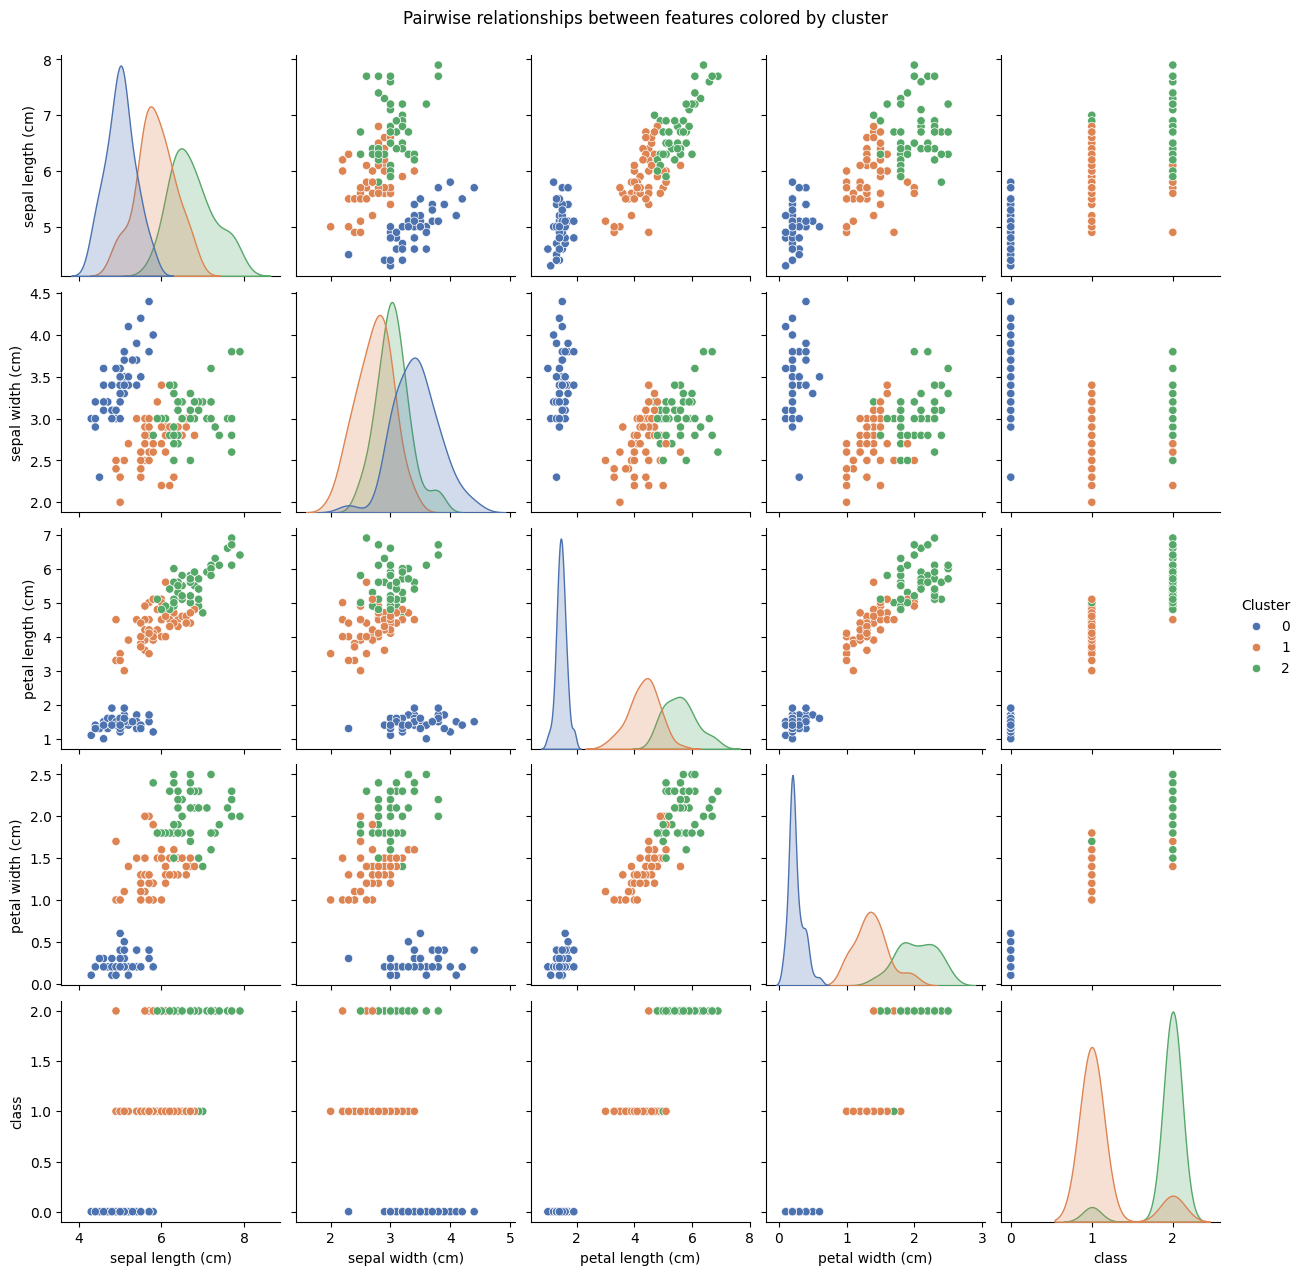

In [34]:
# 2. Pairplot cho tất cả các features
sns.pairplot(df_iris, hue='Cluster', palette='deep')
plt.suptitle('Pairwise relationships between features colored by cluster', y=1.02)
plt.show()

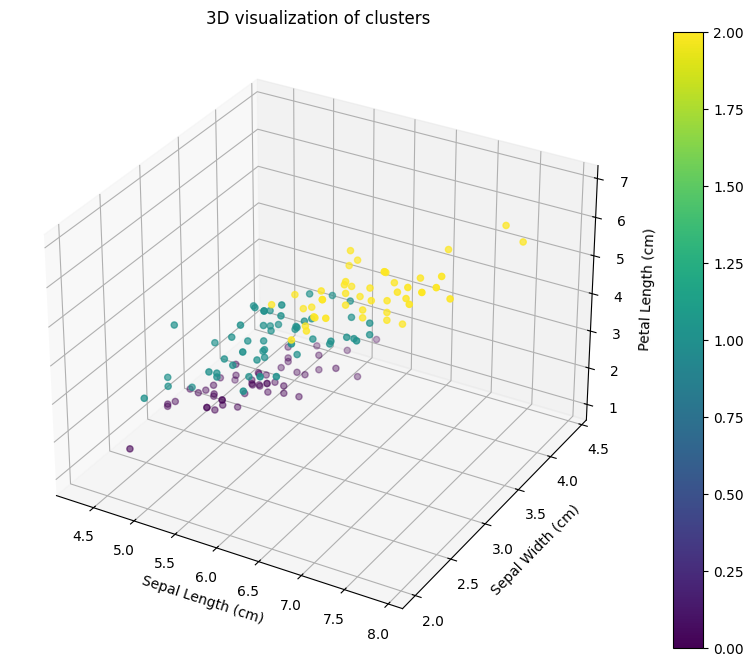

In [35]:
# 3. 3D Scatter Plot với 3 features đầu tiên
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_iris['sepal length (cm)'],
                    df_iris['sepal width (cm)'],
                    df_iris['petal length (cm)'],
                    c=df_iris['Cluster'],
                    cmap='viridis')

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.colorbar(scatter)
plt.title('3D visualization of clusters')
plt.show()